
## Tune Parameters for Confinement Classification
***In this notebook we inspect individual trajectories and tune parameters***
<hr>

### Read File
*import an xml file containing trajectories*

In [13]:
file = 'trajectories-examples/LA_Time_Lapse_23.06.2021_12_57_25_Exp3_51ms_p2_Tracks.xml'

min_track_len = 10

from bkg_func import main, utils, conf_ratio_func
all_tracks, frame_rate, n_tracks = main.ReadTracks(file, minlen = min_track_len)

161/161 tracks; filter > 10 frames (0.51 sec)


### Track Selection
*select a random track - inspect shape*

track with 92 steps


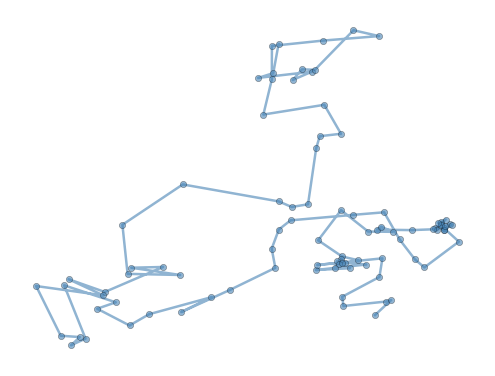

In [14]:
i = 0

track = utils.SingleTrack(all_tracks, i)
utils.plotSingleTrack(track)

### Tune Confinement Ratio Threshold and Rolling Window Size
*computes p for consecutive sub-trajectories using different sliding windows* <br>
*the resulting plot displays the characteristic p  at each position, considering the behavior of the following w positions*

rolling windows: [4, 6, 8] frames ~ [0.204, 0.306, 0.408] sec


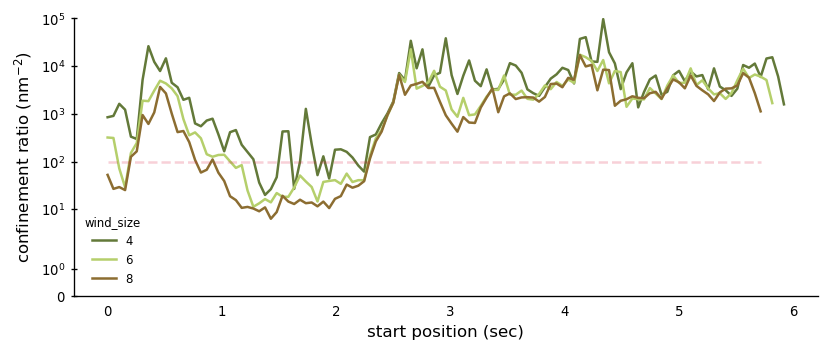

In [4]:
windows = [4, 6, 8]
p_thres = 100

conf_ratios = conf_ratio_func.TuneConfinementThreshold(track, frame_rate, conf_thres = p_thres, windows = windows)
conf_ratio_func.PlotParameterTunnig(conf_ratios, frame_rate, thres = p_thres, ylim = 10e4, log = True)

### Inspect Confined Region
*inspect a specific sub-trajectory [start-to-end] - validate/adjust the performance of the computation above*

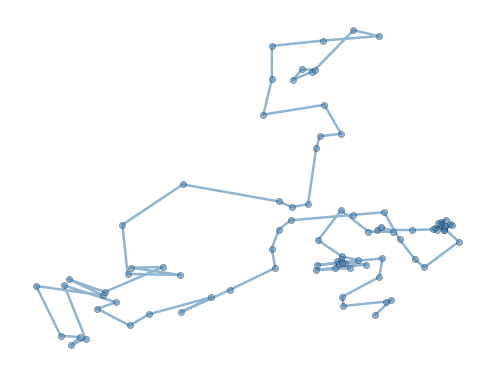

In [6]:
start_point = 3
end_point = 500

utils.plotSingleTrack(track, start = start_point, end = end_point)

### Subtrajectory Classification overview
*computes the whole analysis using pre-defined w, p_thresh and t_thresh* <br>
*confinement periods are colored in red along the selected trajectory in yellow*

track with 185 steps
time threshold: 5.0 frames ~ 0.25s
2 confined events; avg lifetime = 0.714s; avg cage_area = 4.0 nm2


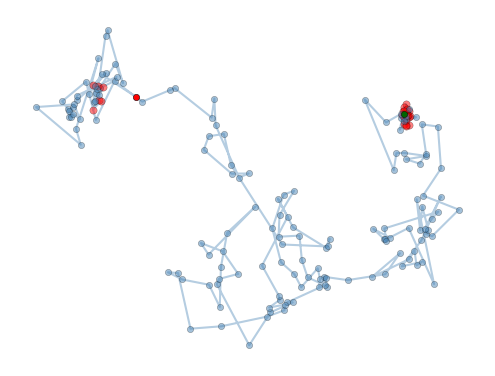

In [10]:
trackID = 3
p_thres = 1000
t_thres = 0.25
window = 8

# run main function
track_score, stats = main.TrajectoryClassification(all_tracks, trackID, p_thres, window, frame_rate, t_thres)


### Check Classification Output

In [9]:
stats

,mode,p_coeff_um-2,lifetime_s,area_nm2,distance_nm,steps
0,confined,3212.192407,2.703,5.0,1754.0,53
1,free_diff,NaN,0.102,NaN,NaN,2
2,confined,13.568761,4.692,186.0,5112.0,92
3,free_diff,0.103679,12.138,9144.0,37119.0,238
4,confined,27.691556,2.397,110.0,2893.0,47
5,free_diff,0.484149,3.111,2280.0,9249.0,61


<hr>